<a href="https://colab.research.google.com/github/duong233/TweetDisaster/blob/main/TweetDisasterLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import necessary libraries and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/MachineLearning/TweetDisaster

/content/drive/MyDrive/MachineLearning/TweetDisaster


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#lib for formatting and handling text
import string
import re

#lib for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split

#lib for nn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model\

#lib for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

#Data Analysis

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#Heat map

<Axes: >

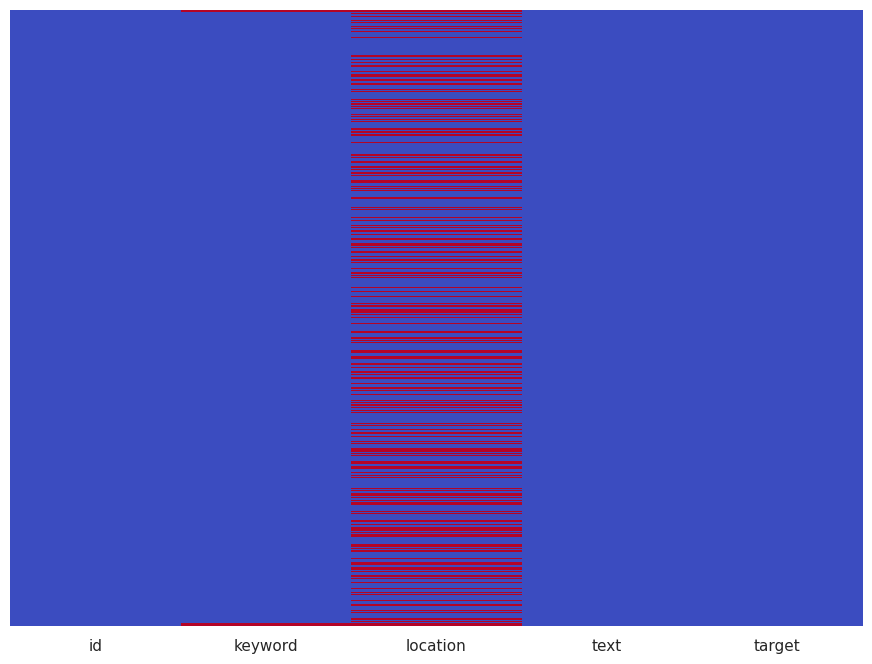

In [ ]:
sns.set(rc={'figure.figsize': (11,8)})
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')

#Analysis and visualization

In [ ]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

Text(0.5, 1.0, 'Target Distributions \n (0: Non Disaster || 1: Disaster)')

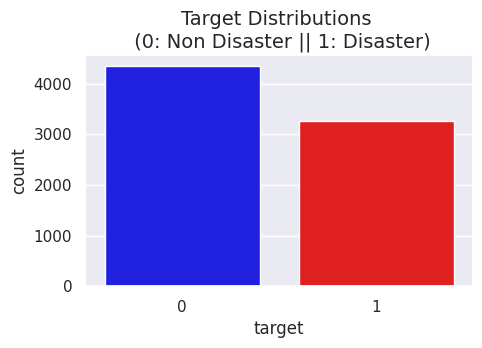

In [ ]:
plt.figure(figsize=(5,3))
colors = ["blue", "red"]

sns.countplot(x = 'target', data=train, palette=colors)
plt.title('Target Distributions \n (0: Non Disaster || 1: Disaster)', fontsize=14)

In [ ]:
train["keyword"].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

Text(0.5, 1.0, 'Top 20 keywords')

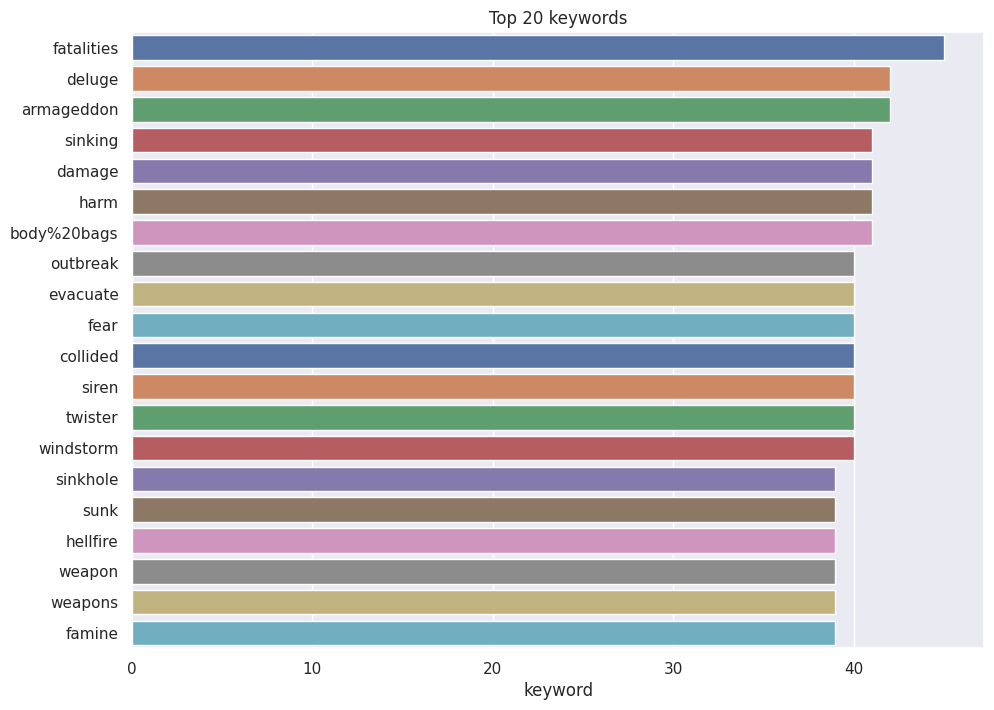

In [ ]:
#plot top 20 keywords
top20 = train['keyword'].value_counts()[:20]

sns.barplot(x=top20, y=top20.index, palette='deep')
plt.title("Top 20 keywords")


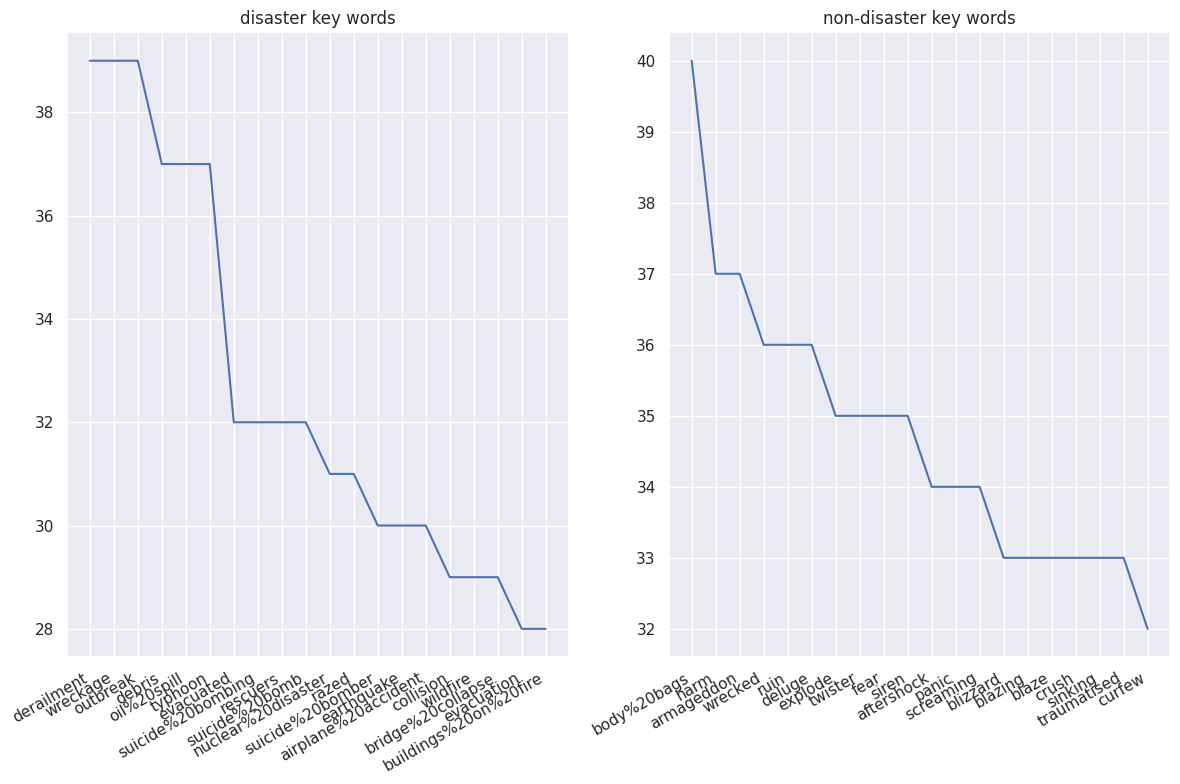

In [ ]:
#plot top 20 each type of keyword
disaster_keywords = train.loc[train['target']==1]['keyword'].value_counts()
nondisaster_keywords = train.loc[train['target']==0]['keyword'].value_counts()

fig,ax = plt.subplots(1, 2, figsize=(12,8))
ax[0].plot(disaster_keywords[:20])
ax[1].plot(nondisaster_keywords[:20])
ax[0].set_title("disaster key words")
ax[1].set_title("non-disaster key words")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

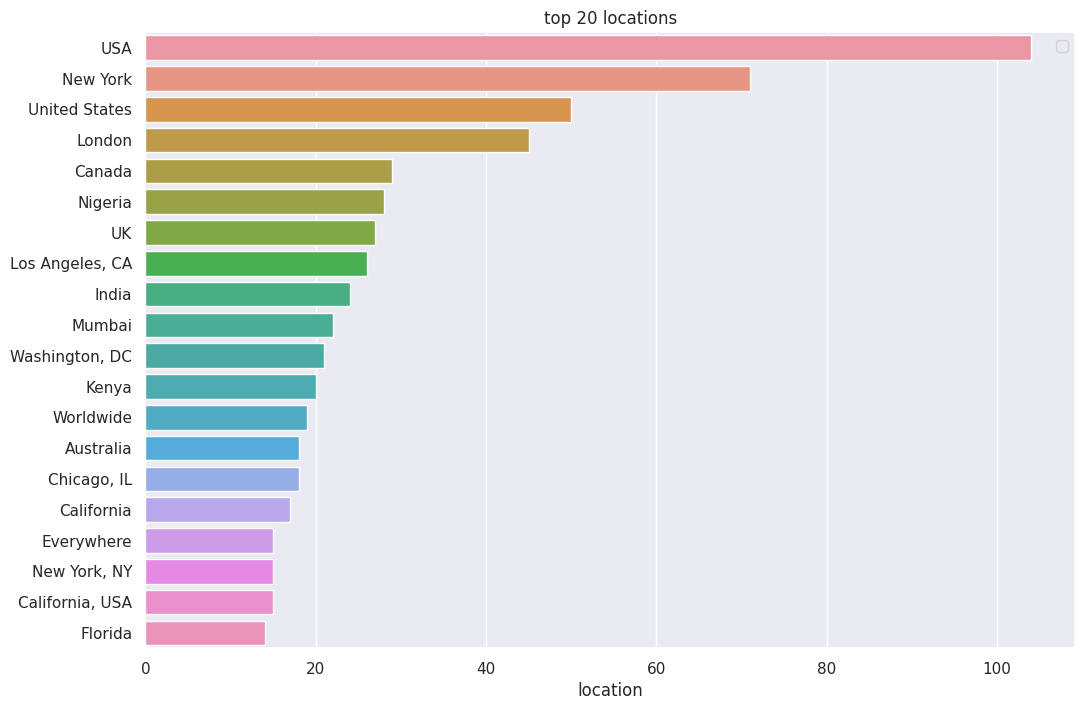

In [ ]:
#plot top 20 locations of tweets
locations = train['location'].value_counts()
plt.figure(figsize=(12,8))

sns.barplot(y=locations[:20].index, x=locations[:20], orient='h')

plt.title('top 20 locations')
plt.legend()

In [ ]:
train["length"] = train["text"].apply(len)
train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [ ]:
train['length'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

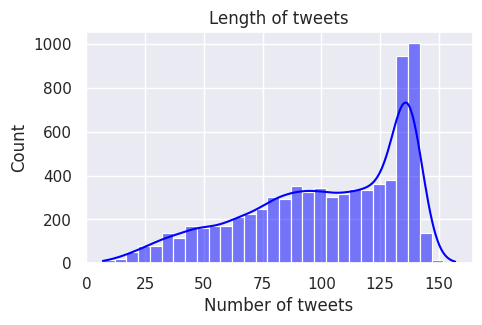

In [ ]:
#plot tweet legnth
plt.figure(figsize=(5,3))
sns.histplot(train['length'], kde=True, color = 'blue', bins = 30)
plt.title("Length of tweets")
plt.xlabel("Number of tweets")
plt.show()

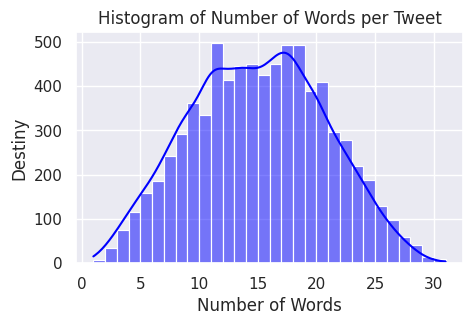

In [ ]:
#plot number of words in tweets
def count_words(x):
  return len(x.split())

train["num_words"] = train['text'].apply(lambda x: count_words(x))
plt.figure(figsize=(5,3))
sns.histplot(train["num_words"], kde=True, color = "blue", bins=30)
plt.title("Histogram of Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Destiny")
plt.show()

#Text preprocessing

##remove punctuation

In [ ]:
def remove_punc(text):
  # return text.translate(str.maketrans('', '', punctuation))
  return text.translate(str.maketrans('', '', string.punctuation))

train['rmv_punc'] = train['text'].apply(lambda x: remove_punc(x))
train['rmv_punc'].head()

0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    Just got sent this photo from Ruby Alaska as s...
Name: rmv_punc, dtype: object

##remove noise

In [ ]:
def remove_urls(text):
  url_pattern =  re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r' ', text)

def remove_HTML(text):
  html=re.compile(r'<.*?>')
  return html.sub(r'',text)

def remove_not_ASCII(text):
  text = ''.join([word for word in text if word in string.printable])
  return text

def remove_mention(text):
  at = re.compile(r'@\S+')
  return at.sub(r'USER', text)

def remove_number(text):
  num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
  return num.sub(r'NUMBER', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

#replace not smile with SADFACE
def change_SADFACE(text):
  eyes = "[8:=;]"
  nose = "['`\-]"
  sad = re.compile(r'[8:=;][\'\-]?[(\\/]')
  return sad.sub(r'SAD', text)
#replace smile with SMILEFACE
def change_SMILE(text):
  eyes = "[8:=;]"
  nose = "['`\-]"
  smiley = re.compile(r'[8:=;][\'\-]?[dDp]')
  return smiley.sub(r'SMILE', text)

#replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

In [ ]:
def clean_tweet(text):
  text = remove_urls(text)
  text = remove_HTML(text)
  text = remove_not_ASCII(text)

  text = remove_mention(text)
  text = remove_number(text)

  text = remove_emoji(text)
  text = change_SADFACE(text)
  text = change_SMILE(text)
  text = transcription_heart(text)
  return text

In [ ]:
#lowercase
train['text_clean'] = train['text'].apply(clean_tweet).str.lower()

In [ ]:
train.head()

,id,keyword,location,text,target,length,num_words,rmv_punc,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,All residents asked to shelter in place are be...,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...,number people receive #wildfires evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby #alaska as ...


##remove stopwords

In [ ]:
nltk.download('stopwords')
def remove_stopwords(text):
  text = [word for word in text.split() if word not in stopwords.words('english')]
  return text
train['text_clean'] = train['text_clean'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##tokenization

In [ ]:
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train['text_clean'])
X = tokenizer.texts_to_sequences(train['text_clean'].values)
X = pad_sequences(X)

In [ ]:
X.shape

(7613, 24)

In [ ]:
y = train['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 41)

#LSTM model

##Embedding

In [ ]:
embed_dim = 32
lstm_out = 32
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(Dropout(0.1))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss= 'binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 32)            96000     
                                                                 
 dropout (Dropout)           (None, 24, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128)


Epoch 1/10
42/42 [==============================] - 5s 39ms/step - loss: 0.6488 - accuracy: 0.6121
Epoch 2/10
42/42 [==============================] - 2s 40ms/step - loss: 0.4544 - accuracy: 0.7981
Epoch 3/10
42/42 [==============================] - 2s 39ms/step - loss: 0.3442 - accuracy: 0.8538
Epoch 4/10
42/42 [==============================] - 2s 50ms/step - loss: 0.2935 - accuracy: 0.8763
Epoch 5/10
42/42 [==============================] - 3s 73ms/step - loss: 0.2656 - accuracy: 0.8912
Epoch 6/10
42/42 [==============================] - 2s 43ms/step - loss: 0.2381 - accuracy: 0.8983
Epoch 7/10
42/42 [==============================] - 2s 40ms/step - loss: 0.2148 - accuracy: 0.9118
Epoch 8/10
42/42 [==============================] - 2s 40ms/step - loss: 0.1979 - accuracy: 0.9229
Epoch 9/10
42/42 [==============================] - 2s 39ms/step - loss: 0.1849 - accuracy: 0.9294
Epoch 10/10
42/42 [==============================] - 2s 40ms/step - loss: 0.1687 - accuracy: 0.9326


In [ ]:
y_test

6887    0
3312    1
4687    1
3720    0
6276    0
       ..
5981    0
2638    0
1164    1
3144    0
1623    1
Name: target, Length: 2284, dtype: int64

In [ ]:
y_pred = model.predict(X_test).round()

72/72 [==============================] - 1s 7ms/step


#Evaluation

In [ ]:
print("Accuracy: " ,(metrics.accuracy_score(y_test, y_pred)))
print("Recal: " , (metrics.recall_score(y_test, y_pred)))

Accuracy:  0.7412434325744308
Recal:  0.7173689619732785


##confusion matrix

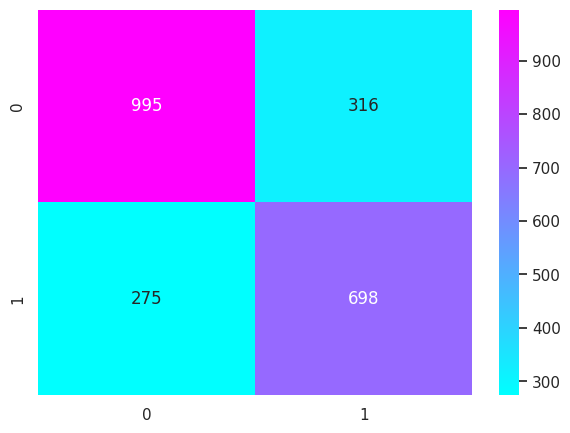

In [ ]:
conm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conm, annot=True, fmt='d', cmap='cool')
plt.show()

##classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1311
           1       0.69      0.72      0.70       973

    accuracy                           0.74      2284
   macro avg       0.74      0.74      0.74      2284
weighted avg       0.74      0.74      0.74      2284



#test with data

In [ ]:
test['text_clean'] = test['text'].apply(remove_punc)
test['text_clean'] = test['text_clean'].apply(clean_tweet).str.lower()
test['text_clean'].head()

0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4    typhoon soudelor kills number in china and taiwan
Name: text_clean, dtype: object